In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
from matplotlib import cm

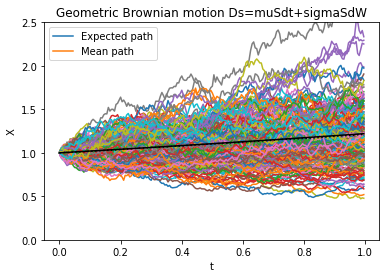

In [2]:
#Monte Carlo simulation of geometric Brownian motion
#dS=mu*S*dt+sigma*S*dW

#Define parameters and time grid
number_paths=2000 #number of paths
T=1 #time horizon
number_steps=200 #number of time steps
dt=T/number_steps #time step
t=np.arange(0,T,dt) #observation times 
muGBM=0.2 #sigma
sigma=0.3 #model parameters
So=1 #initial stock price
muABM=muGBM-0.5*sigma**2 #drift of the corresponding arithmetic BM

#Monte Carlo

#Compute the increments of the arithmetic Brownian motion X =log(S/S0)
dX_X=(muABM)*dt+sigma*np.random.randn(number_paths,number_steps)*np.sqrt(dt)
dX_X=np.insert(dX_X,0,0,axis=1)
dX_X=np.delete(dX_X,-1,axis=1)

#Accumulate the increments
X=np.cumsum(dX_X,axis=1)

#transform to geomtric Brownian motion
S=So*np.exp(X)

#Expected mean and sample paths
plt.figure(1)
df = pd.concat([pd.Series(x) for x in S], axis=1)
df.index=t 
mean_per_step=list(df.apply(lambda row: np.mean(row),axis=1))
EX=So*np.exp(muGBM*t) #expected paths
for z in range(number_steps):
    plt.plot(t,S[z])
plt.plot(t,EX,'k',t,mean_per_step,':k')
plt.legend(['Expected path','Mean path'])
plt.ylim([0,2.5])
plt.xlabel('t')
plt.ylabel('X')
plt.title('Geometric Brownian motion Ds=muSdt+sigmaSdW')
plt.show()

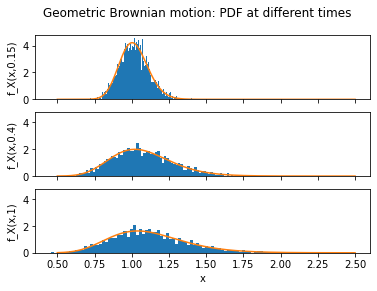

In [3]:
nbins=100
x=np.linspace(0.5,2.5,2000)
fig, axs = plt.subplots(3,sharex=True,sharey=True)
fig.suptitle('Geometric Brownian motion: PDF at different times')
axs[0].hist(S[:,20],bins=nbins,density=True)
axs[0].plot(x,lognorm.pdf(x,s=np.std(X[:,20]),scale=np.exp(np.mean(X[:,20]))))
axs[0].set_ylabel('f_X(x,0.15)')
axs[1].hist(S[:,80],bins=nbins,density=True)
axs[1].plot(x,lognorm.pdf(x,s=np.std(X[:,80]),scale=np.exp(np.mean(X[:,80]))))
axs[1].set_ylabel('f_X(x,0.4)')
axs[2].hist(S[:,120],bins=nbins,density=True)
axs[2].plot(x,lognorm.pdf(x,s=np.std(X[:,120]),scale=np.exp(np.mean(X[:,120]))))
axs[2].set_ylabel('f_X(x,1)')
axs[2].set_xlabel('x')
plt.show()

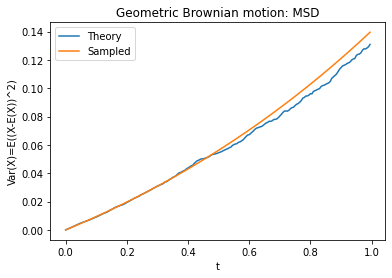

In [4]:
#Variance= mean square deviation = mean square displacement of the random part
plt.figure(3)
theo_var=((So**2)*np.exp((t*2*muABM)+(4*sigma**2/2*t)))-(EX**2)
var_per_step=list(df.apply(lambda row: np.var(row),axis=1))
plt.plot(t,var_per_step,t,theo_var)
plt.legend(['Theory','Sampled'])
plt.xlabel('t')
plt.ylabel('Var(X)=E((X-E(X))^2)')
plt.title('Geometric Brownian motion: MSD')
plt.show()

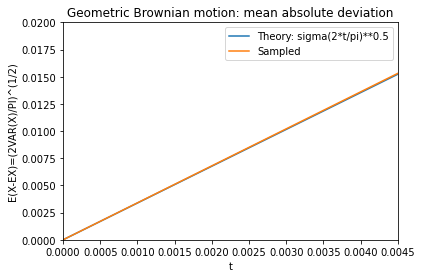

In [5]:
#Mean absolute deviation
plt.figure(4)
full_EX=[EX]*number_paths
abs_diff_to_x=abs(S-EX)
df2=pd.concat([pd.Series(x) for x in abs_diff_to_x], axis=1)
df2.index=t
mean_per_step=list(df2.apply(lambda row: np.mean(row),axis=1))
plt.plot(t,sigma*np.sqrt(2*t/np.pi),t,mean_per_step)
plt.legend(['Theory: sigma(2*t/pi)**0.5','Sampled'])
plt.ylim([0,0.02])
plt.xlim([0,0.0045])
plt.xlabel('t')
plt.ylabel('E(X-EX)=(2VAR(X)/PI)^(1/2)')
plt.title('Geometric Brownian motion: mean absolute deviation')
plt.show()

<Figure size 432x288 with 0 Axes>

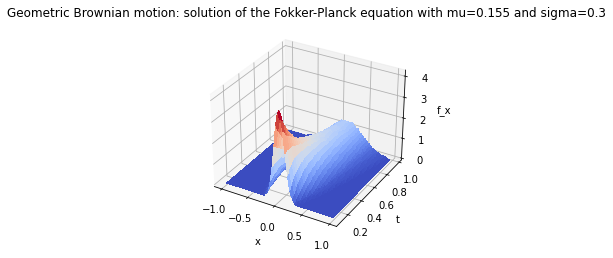

In [6]:
#Solution of the Fokker-Planck equation
plt.figure(5)
D=sigma**2/2*So**2 #diffusion coefficient
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x2=np.arange(-1,1,0.02)
t2=np.arange(0.1,1,0.025)
x2, t2 = np.meshgrid(x2, t2,sparse=False)
f2=np.round((1/(2*np.sqrt(np.pi*D*t2)))*np.exp(-(x2-muABM*t2)**2/(4*D*t2)),1)

surf=ax.plot_surface(x2,t2,f2,cmap=cm.coolwarm,linewidth=0,antialiased=False)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('f_x')
ax.set_title('Geometric Brownian motion: solution of the Fokker-Planck equation with mu={} and sigma={}'.format(np.round(muABM,3),sigma))
plt.show()